In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
from scipy.stats import *
import sympy as smp
import scipy as sp
from scipy.integrate import quad
from pytictoc import TicToc

In [2]:
#define the tic component
timing=TicToc()

#Matrix multiplication
n=3
A=np.random.rand(n**2)
B=np.random.rand(n**2)
A=A.reshape((n,n))
B=B.reshape((n,n))

# (a) Python's operator
C=np.dot(A,B)

# (b) Using three for loops
C1 = np.zeros(n**2)
C1= C1.reshape((n,n))

for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            C1[i][j]=C1[i][j]+A[i][k]*B[k][j]

diff=C-C1
maxdiff=np.round(np.max(np.max(np.abs(diff))),0)

# (c) As (b) swapping the two outer loops over i and j
C = np.zeros(n**2)
C = C.reshape((n,n))
for j in range(0,n):
    for i in range(0,n):
        for k in range(0,n):
            C[i][j]=C[i][j]+A[i][k]*B[k][j]

# (d) Using two for loops over i and j and sum()
C = np.zeros(n**2)
C = C.reshape((n,n))

for i in range(0,n):
    for j in range(0,n):
        C[i][j]=sum(A[i,:]*B[:,j])

# (e) As (d) transposing A
AT=A.transpose((0,1))

C = np.zeros(n**2)
C = C.reshape((n,n))

for i in range(0,n):
    for j in range(0,n):
        C[i][j]=sum(AT[i,:]*B[:,j])

# (f) As (d) transposing B
BT=B.transpose((0,1))

C = np.zeros(n**2)
C = C.reshape((n,n))

for i in range(0,n):
    for j in range(0,n):
        C[i][j]=sum(A[i,:]*BT[:,j])

In [3]:
# (g) As (a-f) with increasing matrix size

n=[3,50,200]
times=np.zeros(len(n))
times2=np.zeros(len(n))
times3=np.zeros(len(n))

for l,m in zip(n,range(len(times))):
    A=np.random.rand(l**2)
    B=np.random.rand(l**2)
    A=A.reshape((l,l))
    B=B.reshape((l,l))

    # (a)
    timing.tic()
    C=np.dot(A,B)
    times[m]=timing.tocvalue()

    # (b)
    timing.tic()
    C1 = np.zeros(l**2)
    C1= C1.reshape((l,l))

    for i in range(0,l):
        for j in range(0,l):
            for k in range(0,l):
                C1[i][j]=C1[i][j]+A[i][k]*B[k][j]
    times2[m]=timing.tocvalue()

    # (c)
    timing.tic()
    C = np.zeros(l**2)
    C = C.reshape((l,l))
    for j in range(0,l):
        for i in range(0,l):
            for k in range(0,l):
                C[i][j]=C[i][j]+A[i][k]*B[k][j]
    times3[m]=timing.tocvalue()

    # do the same for all other steps

In [4]:
timing_frame=pd.DataFrame([times,times2,times3],columns=n)
timing_frame.index=['method a','method b','method c']
timing_frame

,3,50,200
method a,0.000037,0.008617,0.001465
method b,0.000057,0.452353,20.103369
method c,0.000048,0.354650,20.252020


In [5]:
# (g) Find how the CPU time of matrix multiplication scales with matrix size
nvec1=[10,100,500,1000,2000]
time1=np.zeros(len(nvec1))
for l,m in zip(nvec1,range(len(time1))):
    A=np.random.rand(l**2)
    B=np.random.rand(l**2)
    A=A.reshape((l,l))
    B=B.reshape((l,l))

    timing.tic()
    C=np.dot(A,B)
    time1[m]=timing.tocvalue()

nvec2=[10,20,50,100,150]
time2=np.zeros(len(nvec2))
for o,p in zip(nvec2,range(len(time2))):
    A=np.random.rand(o**2)
    B=np.random.rand(o**2)
    A=A.reshape((o,o))
    B=B.reshape((o,o))

    timing.tic()
    C = np.zeros(o**2)
    C= C.reshape((o,o))

    for i in range(0,o):
        for j in range(0,o):
            for k in range(0,o):
                C1[i][j]=C1[i][j]+A[i][k]*B[k][j]
    time2[p]=timing.tocvalue()

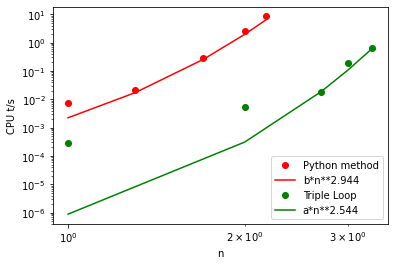

In [38]:
calc1=[]
for i in range(len(nvec2)):
    calc_mult=10**-5.594*(nvec2[i]**2.944)
    calc1.append(calc_mult)

calc2=[]
for i in range(len(nvec2)):
    calc_mult2=10**-8.594*(nvec1[i]**2.544)
    calc2.append(calc_mult2)

plt.figure(1)
plt.plot(np.log10(nvec2),time2,'ro',np.log10(nvec2),calc1,'r',np.log10(nvec1),time1,'go',np.log10(nvec1),calc2,'g')
plt.yscale('log')
plt.xscale('log')
plt.legend(['Python method','b*n**2.944','Triple Loop','a*n**2.544'])
plt.ylabel('CPU t/s')
plt.xlabel('n')
plt.show()